# 描述性统计

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller

def descriptive_statistics(df):
    # 计算描述性统计量
    desc_stats = pd.DataFrame({
        'Mean': df.mean().round(3),
        'StdDev': df.std().round(3),
        'Min': df.min().round(3),
        'Max': df.max().round(3),
        'Skewness': df.skew().round(3),
        'Kurtosis': df.kurtosis().round(3)
    })

    # Jarque-Bera检验
    jb_stat = []
    jb_pvalue = []
    for column in df.columns:
        jb_stat_value, jb_pvalue_value = stats.jarque_bera(df[column])
        jb_stat.append(round(jb_stat_value, 3))
        jb_pvalue.append(round(jb_pvalue_value, 3))
    
    desc_stats['Jarque-Bera Stat'] = jb_stat

    # ADF检验
    adf_stat = []
    adf_pvalue = []
    for column in df.columns:
        adf_stat_value, adf_pvalue_value, _, _, _, _ = adfuller(df[column])
        adf_stat.append(round(adf_stat_value, 3))
        adf_pvalue.append(round(adf_pvalue_value, 3))

    # 添加ADF Stat和P-Value到描述性统计结果
    desc_stats['ADF Stat'] = adf_stat

    # 格式化ADF Stat列，添加显著性标记
    def format_adf_stat(stat, p_value):
        if p_value < 0.01:
            return f"{stat} ***"
        elif p_value < 0.05:
            return f"{stat} **"
        elif p_value < 0.1:
            return f"{stat} *"
        else:
            return str(stat)

    desc_stats['ADF Stat'] = [
        format_adf_stat(stat, p_value) for stat, p_value in zip(adf_stat, adf_pvalue)
    ]

    return desc_stats

# 示例：假设我们有一个包含多个列的数据框df
# df = pd.DataFrame({
#     'Index1': np.random.randn(100),
#     'Index2': np.random.randn(100),
#     'Index3': np.random.randn(100)
# })

# 计算描述性统计量
# result = descriptive_statistics(df)
# print(result)


## 对数收益率

In [3]:
df = pd.read_csv('datasets/log_final_df.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,Geopolitics,Climate Policy,New Energy,Green Bond,Carbon Price,Crude Oil,Natural Gas,Coke
DateTime,,,,,,,,
2018-03-27,0.945740,1.231805,0.024406,0.000311,0.087011,-0.017206,-0.018364,0.000000
2018-03-28,0.945740,1.432220,-0.017754,0.000716,0.000000,-0.029270,-0.000830,-0.054053
2018-03-29,0.945740,1.440635,-0.002633,0.000241,-0.009791,-0.017786,-0.004440,0.024264
2018-03-30,0.945740,1.227887,0.011667,0.000417,0.000000,0.012702,-0.010905,-0.030704
2018-04-02,1.105688,1.621996,-0.004405,0.001388,0.022530,0.012063,-0.025628,0.044232
...,...,...,...,...,...,...,...,...
2023-12-25,0.701641,1.681555,0.004553,0.001069,0.000000,-0.016148,0.004937,-0.010815
2023-12-26,0.701641,2.160888,-0.004474,0.000671,0.000000,0.011458,-0.005928,-0.013095
2023-12-27,0.701641,1.367023,-0.008906,0.000511,0.000000,0.001807,-0.000165,-0.006910


In [4]:
descriptive_statistics(df)

,Mean,StdDev,Min,Max,Skewness,Kurtosis,Jarque-Bera Stat,ADF Stat
Geopolitics,0.929,0.318,0.418,2.475,2.006,7.185,3929.342,-4.141 ***
Climate Policy,1.509,0.532,0.205,4.045,0.637,0.582,114.001,-3.217 **
New Energy,0.000,0.020,-0.078,0.080,-0.019,1.523,133.912,-37.362 ***
Green Bond,0.000,0.001,-0.004,0.008,2.120,31.526,58677.178,-12.049 ***
Carbon Price,0.000,0.042,-0.262,0.256,0.131,9.493,5226.505,-11.682 ***
Crude Oil,0.000,0.024,-0.139,0.122,-0.252,4.170,1021.164,-32.788 ***
Natural Gas,0.000,0.018,-0.123,0.148,0.952,15.068,13373.363,-9.184 ***
Coke,0.000,0.028,-0.322,0.155,-2.087,23.291,32467.206,-36.555 ***


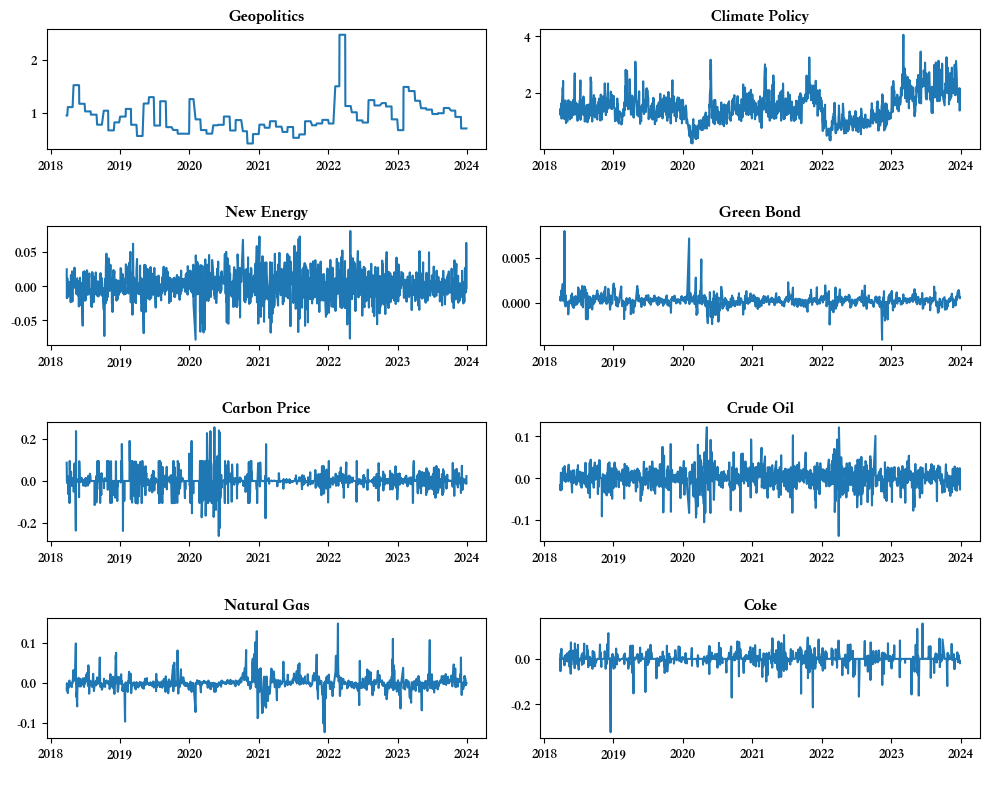

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常

fig, axes = plt.subplots(4, 2, figsize=(10, 8))
title = df.columns
axes = axes.ravel()
for i in range(len(title)):
    ax = axes[i]
    #states.iloc[:, i*9+1:i*9+9].plot(ax=ax)
    ax.plot(df.index, df[title[i]])
    ax.set_title(title[i])
    #ax.legend(loc='upper left',  ncol=1, fontsize=8)  
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.set_ylim([-25, 25])
plt.tight_layout()
plt.savefig('images/收益率分布.svg')

## Garch波动率

In [5]:
volatility_df = pd.read_csv('datasets/garch_volatility_df.csv', index_col=0)
volatility_df.index = pd.to_datetime(volatility_df.index)
descriptive_statistics(volatility_df)

,Mean,StdDev,Min,Max,Skewness,Kurtosis,Jarque-Bera Stat,ADF Stat
Geopolitics,0.232,0.233,0.035,1.622,3.687,18.492,22993.865,-4.919 ***
Climate Policy,0.486,0.224,0.255,1.754,1.672,2.994,1170.055,-4.874 ***
New Energy,0.019,0.004,0.012,0.033,0.633,-0.155,94.812,-3.701 ***
Green Bond,0.001,0.000,0.000,0.003,3.857,22.473,32750.059,-9.198 ***
Carbon Price,0.038,0.019,0.017,0.143,1.684,3.526,1380.237,-3.651 ***
Crude Oil,0.022,0.008,0.014,0.081,2.421,7.990,5065.158,-7.125 ***
Natural Gas,0.016,0.008,0.010,0.071,2.737,8.966,6404.259,-8.549 ***
Coke,0.026,0.007,0.023,0.146,6.368,65.792,260485.893,-22.572 ***


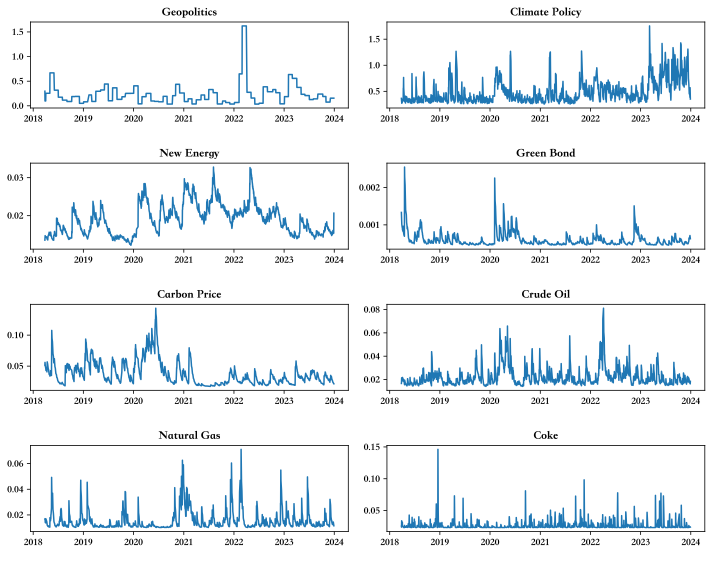

In [6]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
fig, axes = plt.subplots(4, 2, figsize=(10, 8))

title = volatility_df.columns
axes = axes.ravel()
for i in range(len(title)):
    ax = axes[i]
    #states.iloc[:, i*9+1:i*9+9].plot(ax=ax)
    ax.plot(volatility_df.index, volatility_df[title[i]])
    ax.set_title(title[i])
    #ax.legend(loc='upper left',  ncol=1, fontsize=8)  
    ax.set_xlabel(' ')
    ax.set_ylabel('')
    #ax.set_ylim([-25, 25])
plt.tight_layout()
plt.savefig('images/波动率分布.svg')